In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Thresholds
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# About the Dataset


## Content
The dataset comprises credit card transactions made by European cardholders in September 2013. It covers two days, featuring 492 frauds out of 284,807 transactions. Notably, the dataset is highly unbalanced, with fraudulent transactions accounting for only 0.172% of all transactions.

This dataset includes only numerical input variables resulting from a PCA transformation. Due to confidentiality constraints, the original features and additional background information aren't provided. The features V1 through V28 represent principal components obtained via PCA. However, 'Time' and 'Amount' are the only features not subjected to PCA.
- 'Time' indicates the seconds elapsed between each transaction and the first recorded transaction.
- 'Amount' signifies the transaction amount, potentially useful for example-dependent cost-sensitive learning.
- 'Class' represents the response variable, assuming a value of 1 for fraud and 0 otherwise.

# Project Pipeline
- Data Understanding
- Train/Test Split
- Building the model
- Evaluate the model

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

</br>

### so the dataset clean from missing values

### also we will assum it is clean from outliers as all the columns are already PCA transformed, which indicate that the outlier values are taken care while transforming the data.

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**getting the total amount of transactions for each class (fraudulent and non-fraudulent).**

In [6]:
data.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

**so This indicates that the total amount of non-fraudulent transactions is 60127.97**
</br>



</br>

## Distribution of Transaction Amounts by Time

note: 'Time' indicates the seconds elapsed between each transaction and the first recorded transaction.

C:\Users\dell\AppData\Local\Temp\ipykernel_12568\3438997765.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
C:\Users\dell\AppData\Local\Temp\ipykernel_12568\3438997765.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.dis

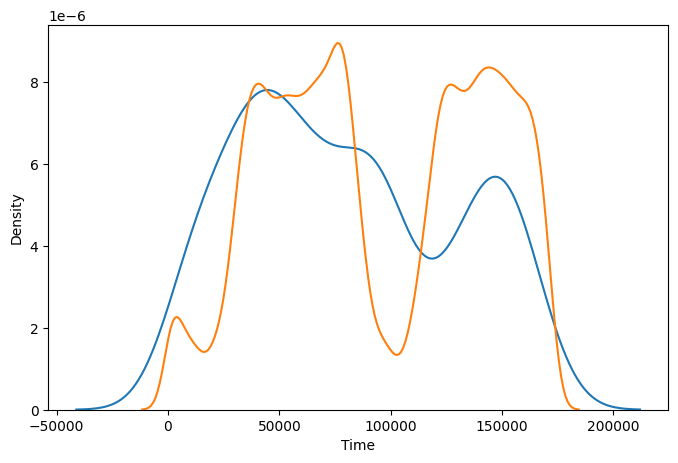

In [27]:
data_fraud = data[data['Class'] == 1]
data_non_fraud = data[data['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
plt.show()

not much information here
</br>

</br>

## Distribution of Transaction Amounts by Class

C:\Users\dell\AppData\Local\Temp\ipykernel_12568\3340202709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Amount', data=data, palette='Set1')


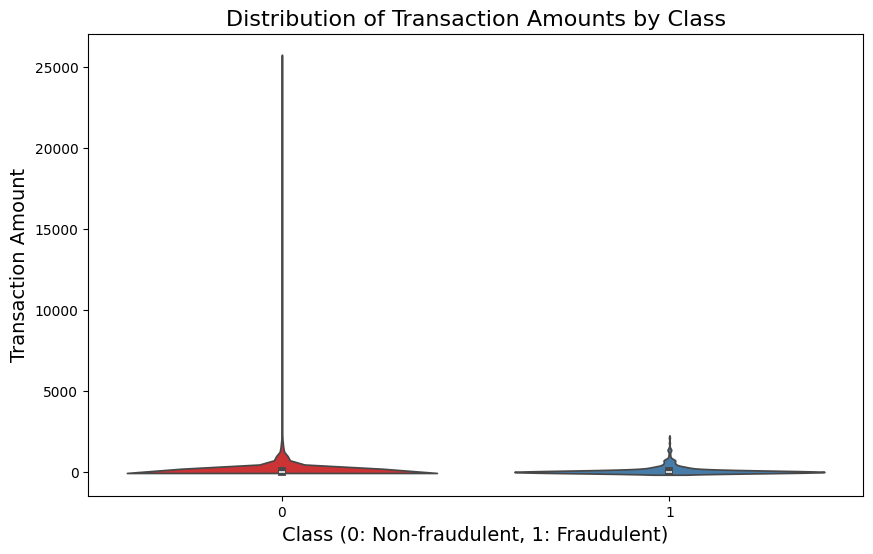

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=data, palette='Set1')

plt.title('Distribution of Transaction Amounts by Class', fontsize=16)
plt.xlabel('Class (0: Non-fraudulent, 1: Fraudulent)', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.show()

#### notice fraudulent transactions mostly occur with smaller amounts, while non-fraudulent transactions happen across a wide range of amount values, from low to high.

In [7]:
data1 = data.drop(columns='Class', axis=1)

In [8]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
scaler = StandardScaler()
inputs= scaler.fit_transform(data1)

In [10]:
target = data['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state=123)

In [12]:
print(f'  X_train{X_train.shape}\n  X_test{X_test.shape}\n \n  y_train{y_train.shape}\n  y_test{y_test.shape}')

  X_train(227845, 30)
  X_test(56962, 30)
 
  y_train(227845,)
  y_test(56962,)


## Models Function

In [22]:
def model(name_model):

    model = name_model()

    model.fit(X_train,y_train)           

    y_trainPred = model.predict(X_train)   
    y_train_report=classification_report(y_train, y_trainPred, target_names = ['No Fraud', 'Fraud'])
     

    print("\nTRAIN MODEL CLASSIFICATION REPORT\n")
    print(y_train_report)


    y_testPred=model.predict(X_test)
    y_test_report=classification_report(y_test, y_testPred, target_names = ['No Fraud', 'Fraud'])
  
    print('--'*27)

    print("\nTEST MODEL CLASSIFICATION REPORT\n")
    print(y_test_report)


    Acc_train = model.score(X_train, y_train)   
    acc_test = model.score(X_test, y_test)

    print('\nTrain Accuracy : {:.2f}%'.format(Acc_train*100))
    print('Test Accuracy  : {:.2f}%'.format(acc_test*100))


    cm = confusion_matrix(y_test, y_testPred)
    labels = ['No Fraud', 'Fraud']
    sns.heatmap(cm, annot=True, fmt='d' ,xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    
    return y_testPred ,model

# LOGISTIC REGRESSION


TRAIN MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.89      0.63      0.74       377

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

------------------------------------------------------

TEST MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Train Accuracy : 99.93%
Test Accuracy  : 99.90%


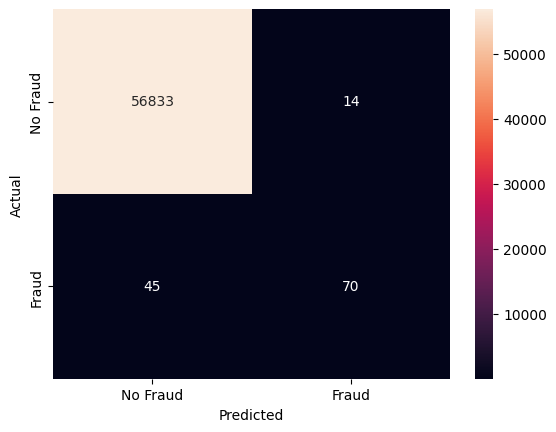

In [19]:
acc_LR = model(LogisticRegression)

#### the model performs exceptionally well in identifying "No Fraud" class cases, with perfect precision and recall achived. But, for the "Fraud" class, it need more improvement, especially the recall, as it identifies correctly only 61% of the real fraud cases. 

# KNEIGHBORS CLASSIFICATION


TRAIN MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       0.95      0.80      0.87       377

    accuracy                           1.00    227845
   macro avg       0.97      0.90      0.93    227845
weighted avg       1.00      1.00      1.00    227845

------------------------------------------------------

TEST MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.88      0.80      0.84       115

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Train Accuracy : 99.96%
Test Accuracy  : 99.94%


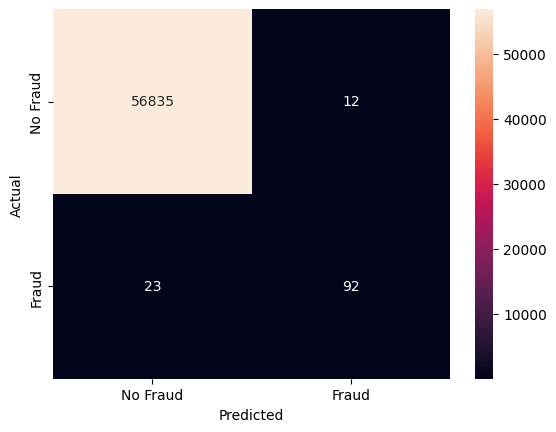

In [20]:
x = model(KNeighborsClassifier)

# RANDOM FOREST CLASSIFICATION


TRAIN MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    227468
       Fraud       1.00      1.00      1.00       377

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

------------------------------------------------------

TEST MODEL CLASSIFICATION REPORT

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56847
       Fraud       0.95      0.80      0.87       115

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train Accuracy : 100.00%
Test Accuracy  : 99.95%


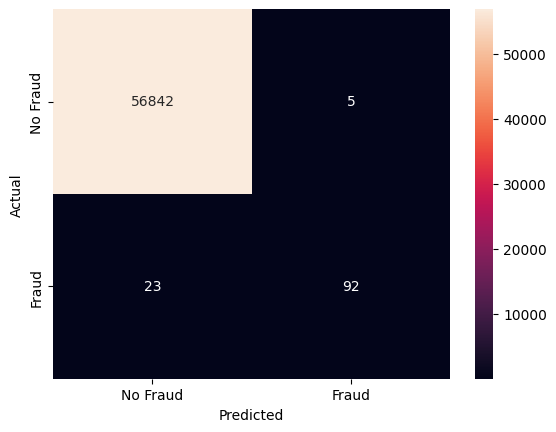

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), RandomForestClassifier())

In [21]:
model(RandomForestClassifier)

# ROC Curve and Optimal Thresholds for Logistic Regression

as we here dealing with heavily imbalanced data having only 0.172% of transactions being fraudulent the accuracy becomes a misleading measure of model performance. this is because if a model simply predicts all transactions as non-fraudulent. it will still achieve over 99% accuracy due to the overwhelming number of non-fraudulent transactions. However, this high accuracy does not mean the model is good at identifying fraud. for that the accuracy is not a good metric for evaluating models in our imbalanced scenario.

for that we have to measure the ROC-AUC score for fair evaluation of the model.